#Linear Algebra

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(0, 5)

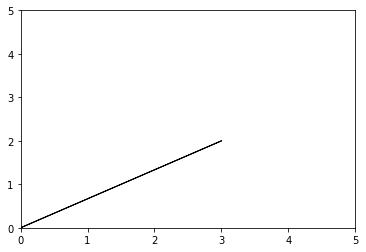

In [6]:
a = [3,2]
plt.arrow(0,0,a[0],a[1])

plt.xlim(0,5)
plt.ylim(0,5)


## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [9]:
## the norm is the length or size of the vector

b = [17,-4,-2,1]
np.linalg.norm(b)

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [10]:
c = [3,7,-2,12]
d = [9,-7,4,6]

np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = [
    [7,4,2],
    [1,3,-1],
    [2,6,-4]
]

trans_E = np.transpose(E)
inv_E = np.linalg.inv(E)

In [18]:
print('E transposed:\n', trans_E,'\n\n', 'Inverse E:\n',inv_E)

E transposed:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]] 

 Inverse E:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [19]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [20]:
## mean customers: 1135.714
## mean snow: 2.714
## std customers: 314.264
## std snow: 2.9277
## var customers: 98761.90506443677 (std squared)
## var snow: 8.57142729 (std squared)
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
## no they are not because the scale of number of customers is much larger than the scale
## of how much snow there is. The comparison would be biased.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [24]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [53]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.columns

Index(['Country', 'Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish',
       'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals',
       'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery'],
      dtype='object')

In [54]:
## standardize data
from sklearn.preprocessing import scale
x = df[['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish',
       'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals',
       'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery']]

y = df[['Country']]
X = pd.DataFrame(scale(x), columns=['Cheese', 'Carcass_Meat', 'Other_Meat', 'Fish',
       'Fats_and_Oils', 'Sugars', 'Fresh_Potatoes', 'Fresh_Veg', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Fresh_Fruit', 'Cereals',
       'Beverages', 'Soft_Drinks', 'Alcoholic Drinks', 'Confectionery'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [55]:
X.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2).fit(X)
pca_samples = pca.transform(X)

In [0]:
principalDf = pd.DataFrame(data=pca_samples, columns=['principalComponent1', 'principalComponent2'])

In [59]:
finalDf = pd.concat([principalDf, y], axis=1)
finalDf.head()

,principalComponent1,principalComponent2,Country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


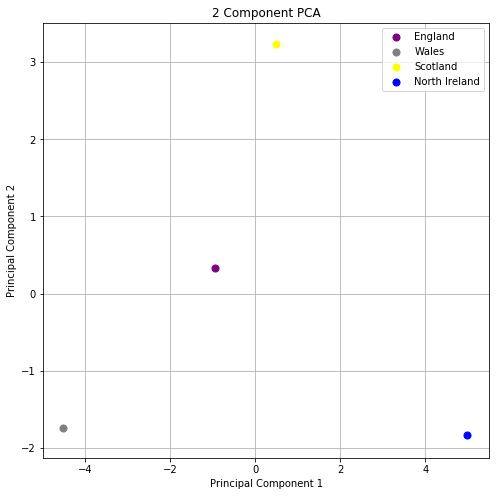

In [63]:
## visualize
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 Component PCA')


countries = ['England', 'Wales', 'Scotland', 'North Ireland']
colors = ['purple', 'grey', 'yellow', 'blue']

ax.scatter(finalDf.loc[finalDf['Country']=='England', 'principalComponent1']
               , finalDf.loc[finalDf['Country']=='England', 'principalComponent2']
               , c = 'purple'
               , s = 50)

ax.scatter(finalDf.loc[finalDf['Country']=='Wales', 'principalComponent1']
               , finalDf.loc[finalDf['Country']=='Wales', 'principalComponent2']
               , c = 'grey'
               , s = 50)

ax.scatter(finalDf.loc[finalDf['Country']=='Scotland', 'principalComponent1']
               , finalDf.loc[finalDf['Country']=='Scotland', 'principalComponent2']
               , c = 'yellow'
               , s = 50)
ax.scatter(finalDf.loc[finalDf['Country']=='North Ireland', 'principalComponent1']
               , finalDf.loc[finalDf['Country']=='North Ireland', 'principalComponent2']
               , c = 'blue'
               , s = 50)
ax.legend(countries)
ax.grid()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [67]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

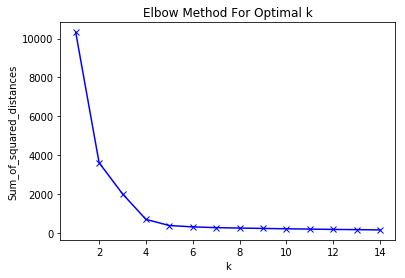

In [69]:
## seems like 4 is the appropriate number of clusters for this data

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [71]:
## getting the labels for each point in the data
## will give each 1 of 4 options in this case

kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[3 1 1 3 1 1 3 3 0 1 1 1 1 1 3 1 3 1 1 2 3 2 2 2 1 1 1 0 1 1 1 1 1 2 1 1 1
 1 0 1 1 2 0 0 0 1 1 1 3 1 2 3 3 0 2 1 1 0 0 3 2 1 3 0 2 0 2 0 3 0 1 1 1 1
 2 2 1 1 0 2 0 1 1 1 0 1 0 1 1 2 0 1 2 1 1 1 1 1 1 1 1 1 3 1 1 2 3 3 3 2 1
 2 1 3 1 1 0 0 2 0 2 1 1 3 1 3 1 2 0 3 1 3 1 3 0 0 1 2 3 1 0 1 1 2 1 0 1 0
 3 1 1 1 3 2 1 0 1 2 1 3 1 1 0 3 2 2 1 0 1 1 3 1 0 2 1 1 1 1 1 3 1 1 1 1 1
 1 3 2 0 1 1 3 2 3 1 0 2 2 1 1]


In [0]:
## adding labels to original dataframe
new_series = pd.Series(labels)
points['clusters'] = new_series.values

In [74]:
## checking dataframe
points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,1


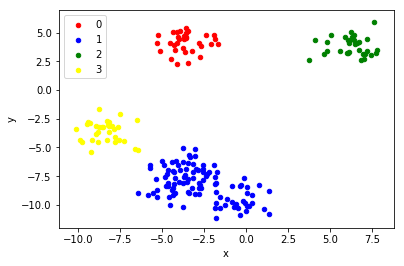

In [76]:
# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue', 2:'green',3:'yellow'}
fig, ax = plt.subplots()
grouped = points.groupby('clusters')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show() 

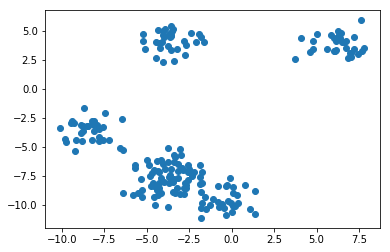

In [81]:
## plotting original without Kmeans
plt.scatter(points['x'], points['y'])